In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,BooleanType,DateType,DecimalType

In [0]:
from pyspark.sql import SparkSession

#Creation of session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()
# either get the app if alreayd built or else create

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema=StructType([StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")

In [0]:
player_match_schema =StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

true indicates that null value will be accepted in that column

In [0]:
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")

filter to include only valid deliveries ie exclude wides and no balls

In [0]:
from pyspark.sql.functions import col,sum,when,avg,row_number
ball_by_ball_df = ball_by_ball_df.filter((col("wides") ==0) & (col("noballs")==0))


calculate total and average eruns in each match and inning

In [0]:
total_and_avg = ball_by_ball_df.groupBy("match_id","innings_no").agg(
  sum("runs_scored").alias("total_runs"),
  avg("runs_scored").alias("avg_runs")
)

window function- calculate running total of runs in each amtch

In [0]:
from pyspark.sql import Window
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
  "running_total_run", sum("runs_scored").over(windowSpec)
)

conditional fomratiing: flag for high impact balls (either wicket or more than 6 runs)

In [0]:
ball_by_ball_df = ball_by_ball_df.withColumn(
  "high_impact",
  when(((col("runs_scored")+ col("extra_runs"))>6) | (col("bowler_wicket")== True),True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+-----------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|n

In [0]:
from pyspark.sql.functions import *

In [0]:
match_df = match_df.withColumn("year",year("match_date"))
match_df = match_df.withColumn("month",month("match_date"))
match_df = match_df.withColumn("day",dayofmonth("match_date"))

match_df = match_df.withColumn(
    "win_margin_category",
    when (col ("win_margin")>100,"High")
    .when((col("win_margin") >=50) & (col("win_margin")<100) , "Medium")
    .otherwise("low")

)
match_df = match_df.withColumn(
    "toss_and_match_winner",
    when (col("toss_winner") == col("match_winner"),"Yes")
    .otherwise("No")
)
match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+---------------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_and_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+---------------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| 

In [0]:
player_df = player_df.withColumn("player_name",lower(regexp_replace("player_name","[^a-zA-Z0-9]","")))

player_df = player_df.na.fill({"batting_hand":"unknown","bowling_skill":"unknown"})

player_df = player_df.withColumn(
    "batting_style",when(col("batting_hand").contains("left"),
    "Left-handed")
    .when(col("batting_hand").contains("Left"),
          "Left-handed")
    .otherwise("right-handed")
    )

player_df.show()

+---------+---------+--------------+----+--------------+--------------------+------------+-------------+
|player_sk|player_id|   player_name| dob|  batting_hand|       bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+--------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|    Right-arm medium|       India|  Left-handed|
|        1|        2|    bbmccullum|null|Right-hand bat|    Right-arm medium| New Zealand| right-handed|
|        2|        3|     rtponting|null|Right-hand bat|    Right-arm medium|   Australia| right-handed|
|        3|        4|      djhussey|null|Right-hand bat|  Right-arm offbreak|   Australia| right-handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan| right-handed|
|        5|        6|       rdravid|null|Right-hand bat|  Right-arm offbreak|       India| right-handed|
|        6|        7|       wjaffer|null|Right-hand bat

In [0]:
player_match_df = player_match_df.withColumn("veteran_status",when(col("age_as_on_match")>=35,"Veteran").otherwise("Non-Veteran"))

# player_match_df=player_match_df.filter(col("batting_status")==!"Did Not Bat")

player_match_df = player_match_df.withColumn("years_since_debut",(year(current_date())-col("season_year")))

player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

converted the above into sql tables

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
   select p.player_name,m.season_year, sum(b.runs_scored) as total_runs from match m join ball_by_ball b on b.match_id = m.match_id 
   join player_match pm on m.match_id = pm.match_id and b.striker = pm.player_id
   join player p on p.player_id = pm.player_id    
   group by p.player_name,m.season_year
   order by m.season_year, total_runs desc                                 """)

In [0]:
top_scoring_batsmen_per_season.show(5)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
+------------+-----------+----------+
only showing top 5 rows



In [0]:
toss_impact = spark.sql("""
select m.match_id,m.match_winner,m.toss_winner,m.toss_name,
case
when m.toss_winner = m.match_winner then "Won" else "Lost" end as match_outcome
from match m 
where m.toss_name is not null
order by m.match_id

                        """)
toss_impact.show()

+--------+--------------------+--------------------+---------+-------------+
|match_id|        match_winner|         toss_winner|toss_name|match_outcome|
+--------+--------------------+--------------------+---------+-------------+
|  335987|Kolkata Knight Ri...|Royal Challengers...|    field|         Lost|
|  335988| Chennai Super Kings| Chennai Super Kings|      bat|          Won|
|  335989|    Delhi Daredevils|    Rajasthan Royals|      bat|         Lost|
|  335990|Royal Challengers...|      Mumbai Indians|      bat|         Lost|
|  335991|Kolkata Knight Ri...|     Deccan Chargers|      bat|         Lost|
|  335992|    Rajasthan Royals|     Kings XI Punjab|      bat|         Lost|
|  335993|    Delhi Daredevils|     Deccan Chargers|      bat|         Lost|
|  335994| Chennai Super Kings|      Mumbai Indians|    field|         Lost|
|  335995|    Rajasthan Royals|    Rajasthan Royals|    field|          Won|
|  335996|     Kings XI Punjab|      Mumbai Indians|    field|         Lost|

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

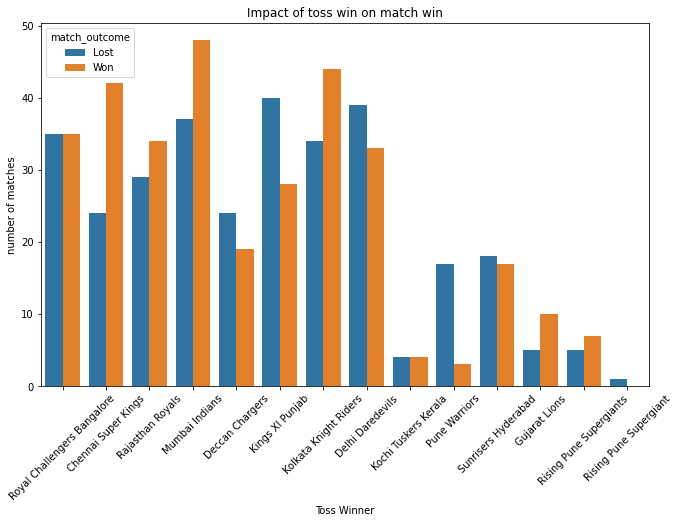

In [0]:
toss_impact_pd = toss_impact.toPandas()
#createing countplot tp show win/loss after winnign toss.
plt.figure(figsize=(10,6))
sns.countplot(x='toss_winner',hue='match_outcome',data=toss_impact_pd)
plt.title("Impact of toss win on match win")
plt.xlabel("Toss Winner")
plt.ylabel("number of matches")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

